In [1]:
%matplotlib inline
import sympy as sym
from sympy import Function
from sympy.solvers import solve
from sympy.plotting import plot
from sympy.utilities.lambdify import lambdastr
sym.init_printing()
#t = sym.Symbol('t')
z = sym.Symbol('z')
#f = sym.symbols('f', cls=Function)
#g = sym.symbols('g', cls=Function)
Tm = sym.Symbol('Tm') # f(t) 
H = sym.Symbol('H0') # g(t) # homogenous radiogenic heating in W m^-3
k = sym.Symbol('k')
d = sym.Symbol('d') # lid thickness
#q0 = sym.Symbol('q0')
Ts = sym.Symbol('Ts')
#Tl = sym.Symbol('Tl')
a_rh = sym.Symbol('a_rh')
Ea = sym.Symbol('Ea')
R_b = sym.Symbol('R_b')
Rp = sym.Symbol('Rp')
Rc = sym.Symbol('Rc')
Ra_crit = sym.Symbol('Ra_crit')
rho = sym.Symbol('rho')
alpha = sym.Symbol('alpha')
g_sfc = sym.Symbol('g_sfc')
kappa = sym.Symbol('kappa')
#hm = sym.Symbol('hm') # mantle thickness
eta0 = sym.Symbol('eta0')
T0 = sym.Symbol('T0')
beta = sym.Symbol('beta')
tau_rad = sym.Symbol('tau_rad')
delta_ubl = sym.Symbol('delta_ubl')


# some values from Thiriet+ 2019 (Mars1)
Tm0 = 1750
H_t0 = 1.6255113699999997e-08#23e-12*3500 #9.24e-6 # from Annual Reviews Furling & Chapman
tau_rad = 2.94e9*3.154e7 # convert to seconds
d0 = 1020e3#300e3
#dTmdt0 = 250/(500e6*3.154e7)
values = {k:4, beta:1/3, g_sfc:3.7, kappa:1e-6, Ra_crit:450, Rc:1700e3, Rp:3400e3, rho:3500, T0:1600, 
          eta0:1e21, alpha:2.5e-5, R_b:8.3144598, Ea:300e3, a_rh:2.54, Ts:250, tau_rad:2.94e9*3.154e7,
          H:H_t0#H:0,, 
          #Tm:Tm0, 
          #d:d0
          }


⎡              _____________________________________________________________  
⎢             ╱       ⎛        2                                   2      ⎞   
⎢Ea⋅H₀⋅Rp - ╲╱  Ea⋅H₀⋅⎝Ea⋅H₀⋅Rp  - 6⋅Ea⋅Tm⋅k + 6⋅Ea⋅Ts⋅k + 6⋅R_b⋅Tm ⋅aᵣₕ⋅k⎠   
⎢───────────────────────────────────────────────────────────────────────────, 
⎣                                   Ea⋅H₀                                     

              _____________________________________________________________⎤
             ╱       ⎛        2                                   2      ⎞ ⎥
Ea⋅H₀⋅Rp + ╲╱  Ea⋅H₀⋅⎝Ea⋅H₀⋅Rp  - 6⋅Ea⋅Tm⋅k + 6⋅Ea⋅Ts⋅k + 6⋅R_b⋅Tm ⋅aᵣₕ⋅k⎠ ⎥
───────────────────────────────────────────────────────────────────────────⎥
                                   Ea⋅H₀                                   ⎦
291364.030374919
6508635.96962508


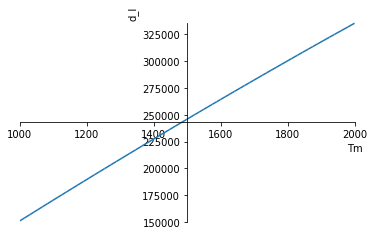

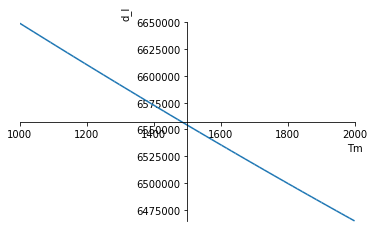

In [12]:
# in spherical coordinates

eta = eta0*sym.exp(Ea/R_b * (Tm**-1 - T0**-1))
deltaT_rh = -R_b*Tm**2/Ea
Tl = Tm + a_rh*deltaT_rh

delta_ubl = (Ra_crit*kappa*eta/(alpha*rho*g_sfc*(Tm-Tl)))**(1/3)  #(h)*(Ra_crit/Ra_rh)**beta
q_bl = k*(Tm-Tl)/delta_ubl

r = sym.Symbol('r')
T_spherical = H/(6*k) * (Rp**2 - r**2) + Ts

express = sym.solve(T_spherical.subs(r, Rp - d) - Tl, d)
sym.pprint(express)
print(express[0].subs(values).subs(Tm, Tm0))
print(express[1].subs(values).subs(Tm, Tm0))
plot(express[0].subs(values), (Tm, 1000, 2000), ylabel='d_l')
plot(express[1].subs(values), (Tm, 1000, 2000), ylabel='d_l')

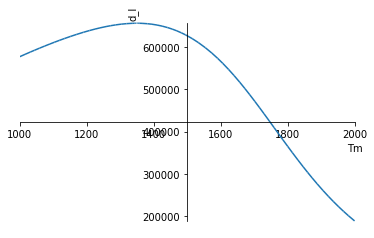

'lambda Tm: ((-R_b*Tm**2*a_rh*k + sqrt(k*(2.0*Ea**2*H0*Tm*(Ea*Ra_crit*eta0*kappa*math.exp(Ea/(R_b*Tm) - Ea/(R_b*T0))/(R_b*Tm**2*a_rh*alpha*g_sfc*rho))**0.666666666666667 - 2.0*Ea**2*H0*Ts*(Ea*Ra_crit*eta0*kappa*math.exp(Ea/(R_b*Tm) - Ea/(R_b*T0))/(R_b*Tm**2*a_rh*alpha*g_sfc*rho))**0.666666666666667 - 2.0*Ea*H0*R_b*Tm**2*a_rh*(Ea*Ra_crit*eta0*kappa*math.exp(Ea/(R_b*Tm) - Ea/(R_b*T0))/(R_b*Tm**2*a_rh*alpha*g_sfc*rho))**0.666666666666667 + R_b**2*Tm**4*a_rh**2*k)))/(Ea*H0*(Ea*Ra_crit*eta0*kappa*math.exp(Ea/(R_b*Tm) - Ea/(R_b*T0))/(R_b*Tm**2*a_rh*alpha*g_sfc*rho))**(1/3)))'

In [42]:
plot(d_fTm[0].subs(values), (Tm, 1000, 2000), ylabel='d_l')
lambdastr(Tm, d_fTm[0])


250 + 0.000586866423042488*210**(1/3)*(-84.474911568*Tm**2 + sqrt(7136.01068442142*Tm**4 - 177951548.281473*Tm**2*(exp(36081.7187425694/Tm)/Tm**2)**0.666666666666667 + 2527873116101.13*Tm*(exp(36081.7187425694/Tm)/Tm**2)**0.666666666666667 - 631968279025282.0*(exp(36081.7187425694/Tm)/Tm**2)**0.666666666666667))*(1.91597619769931e-8*Tm**2*(exp(36081.7187425694/Tm)/Tm**2)**(-0.333333333333333) + 3.81583217330718e-11*210**(1/3)*(-84.474911568*Tm**2 + sqrt(7136.01068442142*Tm**4 - 177951548.281473*Tm**2*(exp(36081.7187425694/Tm)/Tm**2)**0.666666666666667 + 2527873116101.13*Tm*(exp(36081.7187425694/Tm)/Tm**2)**0.666666666666667 - 631968279025282.0*(exp(36081.7187425694/Tm)/Tm**2)**0.666666666666667))/(exp(36081.7187425694/Tm)/Tm**2)**(1/3))/(exp(36081.7187425694/Tm)/Tm**2)**(1/3) - 1.11969188923961e-14*210**(2/3)*(-84.474911568*Tm**2 + sqrt(7136.01068442142*Tm**4 - 177951548.281473*Tm**2*(exp(36081.7187425694/Tm)/Tm**2)**0.666666666666667 + 2527873116101.13*Tm*(exp(36081.7187425694/Tm)/Tm*

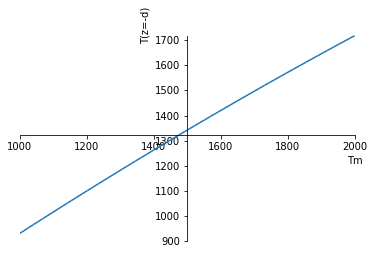

In [38]:
print(T_z.subs(z, -d).subs(d, d_fTm[0]).subs(values))
plot(T_z.subs(z, -d).subs(d, d_fTm[0]).subs(values), (Tm, 1000, 2000), ylabel='T(z=-d)')

70633.2391965141*210**(1/3) ,  -253308.255255018*210**(1/3)


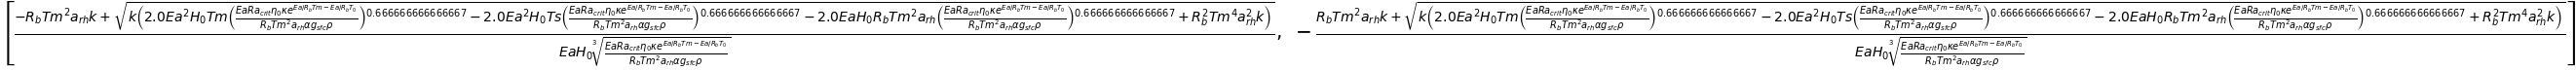

In [31]:
d_fTm = solve(T_z.subs(z, -d) - Tl, d)
#print(sym.latex(d_fTm))
d_fTm_sub0 = d_fTm[0].subs(values).subs(Tm, Tm0)
d_fTm_sub1 = d_fTm[1].subs(values).subs(Tm, Tm0)
print('d=', d_fTm_sub0, ', ', d_fTm_sub1)
d_fTm


In [21]:
# derive expression for T(z)
eta = eta0*sym.exp(Ea/R_b * (Tm**-1 - T0**-1))
deltaT_rh = -R_b*Tm**2/Ea
Tl = Tm + a_rh*deltaT_rh

#hm = Rp - d - delta_ubl - Rc
#Ra_rh = rho*alpha*(Rp - Rc)**3*g_sfc/(kappa*eta) * (Tm-Tl) 
delta_ubl = (Ra_crit*kappa*eta/(alpha*rho*g_sfc*(Tm-Tl)))**(1/3)  #(h)*(Ra_crit/Ra_rh)**beta
q_bl = k*(Tm-Tl)/delta_ubl
q_s = q_bl + H*d # surface heat flux 
T_z = -H/(2*k)*(z)**2 - q_s/k*(z) + Ts
#sym.pprint(T_z)
#sym.latex(T_z)
sym.pprint(eta.subs(values).subs(Tm, Tm0))
sym.pprint(q_bl.subs(values).subs(Tm, Tm0))
sym.pprint(delta_ubl.subs(values).subs(Tm, Tm0))

1.44720755374258e+20
0.00882495030331215
97717.0438304164


In [22]:
# try to solve the above, assuming nothing about d0
# find intersection of Tl(Tm) and T(z=d)



Tl_sub = T_z.subs(values).subs(z, -d).subs(Tm,Tm0) # expression for Tl from T(z) profile
d_1 = solve(Tl_sub - Tl.subs(values).subs(Tm,Tm0), d)
sym.pprint(d_1) # in m

# yay
# this only works if you sub in Tm first and then solve for d


1534.41298610250
[-1505644.49922643, 419838.461054929]


In [5]:
d_t2019 = delta_ubl*(Tl-Ts)/(Tm-Tl)
d_t2019.subs(values).subs(Tm, Tm0)
# this gives an answer 10x higher

In [12]:
Tl_upper = T_z.subs(values).subs(z, -d) # expression for Tl from T(z) profile
d_Tm = solve(Tl_upper.subs(values) - Tl.subs(values), d)
sym.latex(d_Tm)

MemoryError: 

In [ ]:
# everything above this cell is working and giving ok answers

In [ ]:
a

In [57]:
# given values at t0, plot T(z)
plot(T_z_sub.subs({Tm:1500,d:d0), (z, 0, -d0))
print('T(z=-d) =', T_z_sub.subs(z, -d0), 'K')
print('Tl =', Tl.subs(values), 'K\n')
print('\Delta T_rh =', deltaT_rh.subs(values), 'K')
print('q_bl =', q_bl.subs(values), 'W m^-2')

# point is you should get the same value for T(z=-d) and Tl. 

# is it possible to simultaneously solve continuity of flux and continuity of temperature?
# you're probably fixing one too many parameters? 
# i think continuity of flux is unfair 

ValueError: The same variable should be used in all univariate expressions being plotted.

In [54]:
delta_u2 = (Ra_crit*kappa*eta*Ea/(alpha*rho*g_sfc*a_rh*R_b*Tm**2))**(1/3)
delta_u_subs = delta_u2.subs(values)
print('delta_u =', delta_u_subs*1e-3, 'km')

delta_u = 10.5507570546554*(exp(36081.7187425694/Tm)/Tm**2)**0.333333333333333 km


In [55]:
Tratio = (Tm - (a_rh*R_b*Tm**2/Ea) - Ts)/(a_rh*R_b/Ea*Tm**2)
Tratio_subs = Tratio.subs(values)

-918794.173600198*(exp(22.5510742141059*(1600 - Tm)/Tm)/Tm**2)**0.333333333333333*(21.118727892*Tm**2 - 300000.0*Tm + 75000000.0)/Tm**2
d_bl(Tm=1500) = 244.417316670188 km
d_lid(Tm=1500) = 1684.49713562798 km
Tl(Tm=1500) = 1341.60954081000 K


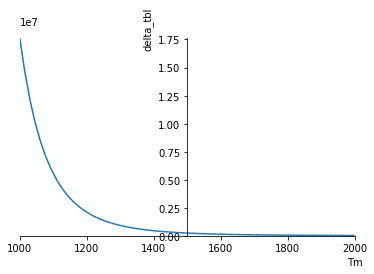

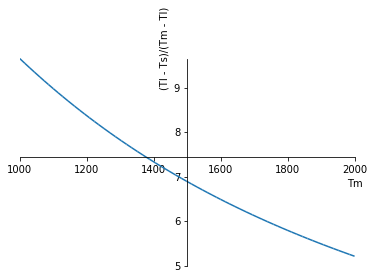

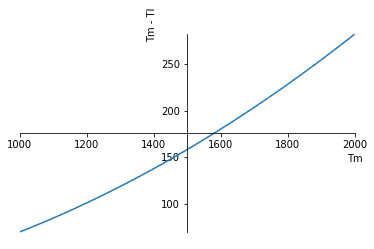

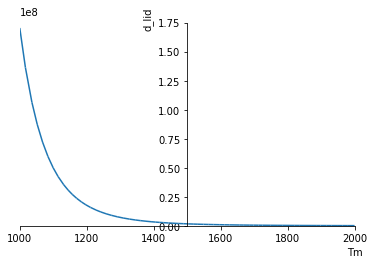

Tl = Tm - 7.03957596400000e-5 Tm^2


In [56]:
"""
solve q_tbl = q_lid(z=-d) continuity of flux as opposed to temperature
"""
Tm = sym.Symbol('Tm')
d_Tm = delta_u2 * (Tm - (a_rh*R_b*Tm**2/Ea) - Ts)/(a_rh*R_b/Ea*Tm**2) # find d(T_m)
d_Tm = sym.simplify(d_Tm)
d_Tm_sub = d_Tm.subs(values)
print(d_Tm_sub)
print('d_bl(Tm=1500) =', delta_u_subs.subs(Tm, 1500)*1e-3, 'km')
print('d_lid(Tm=1500) =', d_Tm_sub.subs(Tm, 1500)*1e-3, 'km')
print('Tl(Tm=1500) =', Tl.subs(values).subs(Tm, 1500), 'K')
plot(delta_u_subs, (Tm, 1000, 2000), ylabel='delta_tbl')
plot(Tratio_subs, (Tm, 1000, 2000), ylabel='(Tl - Ts)/(Tm - Tl)')
#plot(Tl.subs(values), (Tm, 1000, 2000), ylabel='Tl')
plot((Tm-Tl).subs(values), (Tm, 1000, 2000), ylabel='Tm - Tl')
plot(d_Tm_sub, (Tm, 1000, 2000), ylabel='d_lid')
print('Tl = Tm -', (a_rh*R_b/Ea).subs(values), 'Tm^2')

In [ ]:
# iterate to find d, given Tm(t)
# because q_bl depends on d, need to update this also

def D_lid(values, d_lid0, T_l_rh, tol=1):
    dT = 9
    while dT>=tol:
        T_l_rh = Tm - deltaT_rh # lid base T from viscous temperature scale
        T_l_lith = -H/(2*k)*z**2 - q_s/k*z + Ts # lid base T from lithopshereic T(z) profile 
        dT = sym.Abs(T_l_rh - T_l_lith)
    return d

In [ ]:
"""thought: maybe don't need this d solution because their flux continuity thing is correct - 
d/dr [k*deltaT_bl/bl] = d/dr [k*deltaT_lid]|r=d_lid
otherwise there would be a discontinuity at lid base - i guess it makes sense for flux continuity
check this logic with Oli once you've written up

ok so this gives an answer but it seems like an overestimation
problem is you get a different answer by equating flux than if you equate temperatures

"""

In [81]:
# plug into T(z) using z=-d and T=T_l

d_t = solve(T_z.subs(z, -d) - Tl, d)
print('d(t) =', d_t) # hopefully one is real and one is imaginary?? lol

# basically there is no root so no analytic expression for d but i think an iterative method would work

d(t) = [-Rc/3 + Rp/3 - ((Rc - Rp)**2 - 3*(Ea*Ra_crit*eta0*kappa*exp(Ea/(R_b*f(t)))/(-R_b*Rc**3*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) + 3*R_b*Rc**2*Rp*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) - 3*R_b*Rc*Rp**2*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) + R_b*Rp**3*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0))))**(-beta)*(2*Ea*Ts*k*(Ea*Ra_crit*eta0*kappa*exp(Ea/(R_b*f(t)))/(-R_b*Rc**3*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) + 3*R_b*Rc**2*Rp*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) - 3*R_b*Rc*Rp**2*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) + R_b*Rp**3*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0))))**beta - 2*Ea*k*(Ea*Ra_crit*eta0*kappa*exp(Ea/(R_b*f(t)))/(-R_b*Rc**3*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) + 3*R_b*Rc**2*Rp*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) - 3*R_b*Rc*Rp**2*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0)) + R_b*Rp**3*a_rh*alpha*g_sfc*rho*f(t)**2*exp(Ea/(R_b*T0))))**beta*f(t) + 2*R_b*a_rh*k*(Ea*Ra_crit*eta0*kappa*exp(Ea/(R_b*f(t))

In [69]:
print('d =', d_t[0].subs(values), 'm \n\n or \n\n d =', d_t[1].subs(values))

d = 566666.666666667 - (-4.9058363997509e+18 + 4.61909448849341e+17*I)**(1/3)/3 - 965232264456.766/(-4.9058363997509e+18 + 4.61909448849341e+17*I)**(1/3) m 
 or 
 d = 566666.666666667 - 965232264456.766/((-4.9058363997509e+18 + 4.61909448849341e+17*I)**(1/3)*(-1/2 - sqrt(3)*I/2)) - (-4.9058363997509e+18 + 4.61909448849341e+17*I)**(1/3)*(-1/2 - sqrt(3)*I/2)/3


In [17]:
#  differentiate and plug in
d_val = d_t[1].subs({k:4, beta:1/3, g_sfc:10, kappa:1e-6, Ra_crit:450, Rc:1700, Rp:3400, rho:3500, T0:1600, 
                   eta0:1e21, alpha:2.5e-5, R_b:8.3144598, Ea:300, a_rh:2.54, Ts:250})
d_val = d_val.subs(f(t), Tm0)
d_val = d_val.subs(g(t), H_t0)
print('d =', d_val)
d_t0 = d_t[0]
d_t1 = d_t[1]
dddt_0 = sym.diff(d_t0, t)
dddt_1 = sym.diff(d_t1, t) 

d = 1700/3 - 151789024654.767/((-1/2 - sqrt(3)*I/2)*(1.96121774984818e+15 + 3.07279503158565e+17*I)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(1.96121774984818e+15 + 3.07279503158565e+17*I)**(1/3)/3


In [12]:
ans = dddt_0.subs({k:4, beta:1/3, g_sfc:10, kappa:1e-6, Ra_crit:450, Rc:1700, Rp:3400, rho:3500, T0:1600, 
                    eta0:1e21, alpha:2.5e-5, R_b:8.3144598, Ea:300, a_rh:2.54, Ts:250})
ans = ans.subs(sym.Derivative(f(t), t), dTmdt)
ans = ans.subs(f(t), Tm0)
ans = ans.subs(sym.Derivative(g(t), t), -H_t0/tau_rad)
ans = ans.subs(g(t), H_t0)
print(ans*3.154e7)

-10513333.3333333*(0.0206289097871353 + 5.02727949904831*I)/(1.96121774984818e+15 + 3.07279503158565e+17*I)**(2/3) - 4.78742583761134e+18*(-0.0206289097871353 - 5.02727949904831*I)/(1.96121774984818e+15 + 3.07279503158565e+17*I)**(4/3) - 156.648116328006/(1.96121774984818e+15 + 3.07279503158565e+17*I)**(1/3)


In [ ]:
# use iterative method to get initial lid thickness

In [21]:
# # substitute expressions for q0 - - this is with Tm, H0 as a symbol
# eta = eta0*sym.exp(Ea/R_b * (Tm**-1 - T0**-1))
# Tl = Tm - a_rh*(R_b*Tm**2)/Ea
# Ra_rh = rho*alpha*hm**3*g_sfc/(kappa*eta) * (Tm-Tl)
# delta_ubl = (Rp - d - Rc)*(Ra_crit/Ra_rh)**beta
# q0 = k*(Tm-Tl)/delta_ubl

# print('q0 =', q0)


q0 = R_b*Tm**2*a_rh*k*(Ea*Ra_crit*eta0*kappa*exp(Ea*(1/Tm - 1/T0)/R_b)/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**(-beta)/(Ea*(-Rc + Rp - d))


In [14]:
# # solve for d (lid thickness) - this is with Tm, H0 as a symbol

# d_soln = solve(H0/(2*k)*d**2 + q0/k*d + Ts-Tl, d)
# print(d_soln)
# # can use this to get initial lid thickness

[-Rc/3 + Rp/3 - ((Rc - Rp)**2 - 3*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**(-beta)*(-2*Ea*Tm*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta + 2*Ea*Ts*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta + 2*R_b*Tm**2*a_rh*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta - 2*R_b*Tm**2*a_rh*k)/(Ea*H0))/(3*((Rc - Rp)**3 + sqrt(-4*((Rc - Rp)**2 - 3*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**(-beta)*(-2*Ea*Tm*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta + 2*Ea*Ts*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta + 2*R_b*Tm**2*a_rh*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))*

In [22]:
# dddT0 = sym.diff(d_soln[0], Tm)
# dddT1 = sym.diff(d_soln[1], Tm)
# print(dddT0)
# print('\n\n')
# print(dddT1)

-(-3*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**(-beta)*(-2*Ea*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta + 4*R_b*Tm*a_rh*k*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta - 4*R_b*Tm*a_rh*k - 2*R_b*Tm**3*a_rh*alpha*beta*g*hm**3*k*rho*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta*(-Ea**2*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b**2*Tm**4*a_rh*alpha*g*hm**3*rho) - 2*Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**3*a_rh*alpha*g*hm**3*rho))*exp(Ea/(R_b*T0))*exp(-Ea/(R_b*Tm))/(Ra_crit*eta0*kappa) + 2*R_b*Tm**2*Ts*a_rh*alpha*beta*g*hm**3*k*rho*(Ea*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b*Tm**2*a_rh*alpha*g*hm**3*rho))**beta*(-Ea**2*Ra_crit*eta0*kappa*exp(-Ea/(R_b*T0))*exp(Ea/(R_b*Tm))/(R_b**2*Tm**4*a_rh*alpha*g*hm**3*rho) - 2